# 工业场景下裂缝的识别

## 项目简介

隧道裂缝是影响铁路交通安全的重要病害之一，其不仅会削弱隧道结构的完整性，还可能引发严重的运营风险。为确保铁路隧道的安全性，针对裂缝的早期检测与精确定位显得尤为重要。然而，隧道裂缝的检测面临诸多挑战：如图像中普遍存在的低对比度、光照不均匀、噪声污染等问题，导致传统的检测方法难以准确识别微小的裂缝特征，尤其是宽度仅在 1-5mm 范围内的裂缝。因此，开发一个高精度的实例分割模型来自动化识别和分割这些裂缝，是提升隧道病害监测效率和精度的关键。

## 项目意义

本项目通过构建基于 MindSpore 框架的实例分割模型，解决了隧道裂缝检测中的技术难点。利用先进的深度学习模型，如 Res-UNet 和 VGG-UNet，在复杂环境下准确定位并分割微小裂缝区域，不仅显著提升了检测精度，还降低了人工检测的工作量与误差。该模型的应用能够及时发现潜在的结构问题，确保隧道的安全运行，进而保障铁路交通的稳定性与安全性。项目还通过创新性的图像后处理技术，进一步精确识别裂缝区域，确保裂缝检测结果具备更高的可靠性与适用性。


## 语义分割
 在详细介绍模型结构之前，首先我们需要明确何为语义分割：

 识别隧道中的裂缝可以抽象成为一个图像语义分割任务。语义分割（semantic segmentation）是图像处理和机器视觉领域中一个重要的任务，旨在对图像进行全面的理解。具体而言，语义分割将图像中的每一个像素进行分类，赋予其特定的标签。这一过程在人工智能（AI）领域中占据了重要地位，广泛应用于人脸识别、物体检测、医学影像分析、卫星图像处理、自动驾驶感知等多个领域。

与传统的分类任务仅输出一个类别不同，语义分割任务的输出图像与输入图像的尺寸相同。换句话说，输出图像的每个像素都与输入图像中的相应像素一一对应，并标注其类别。这意味着语义分割不仅关注整体物体的识别，还能够细致到每个像素的分类，从而提供更丰富的场景理解。

在图像处理领域，"语义" 指的是图像内容的深层理解，反映了对图像所承载信息的全面把握。下图展示了一些语义分割的示例，直观地表明了不同类别在图像中的具体表现。通过这些示例，我们可以更清晰地理解语义分割的实际应用和效果。

![segment_example.png](https://tunnelcrack.obs.cn-north-4.myhuaweicloud.com/ipynb_img/segment_example.png)

## 模型简介

 该部分介绍了后面需要用到的网络模型的结构
 - U-Net说明
 > *U-Net: Convolutional Networks for Biomedical Image Segmentation*

   U-Net 是一种经典的语义分割模型，最初用于医学图像分析。其网络架构采用 Encoder-Decoder 结构，左侧的 Encoder 部分用于提取图像特征，右侧的 Decoder 部分通过上采样重构图像。自 2015 年提出以来，U-Net 衍生出了多种改进版本，如 Res-UNet、UNet 3+ 等。U-Net 的网络结构使其在处理低对比度和噪声较大的图像时具备良好的表现，因此在本项目中得到采用。网络结构如下图所示：
 
 ![Unet_structure.png](https://tunnelcrack.obs.cn-north-4.myhuaweicloud.com/ipynb_img/Unet_structure.png)


 - Res-UNet说明
 > *Weighted Res-UNet for High-Quality Retina Vessel Segmentation*

   Res-UNet 是在 U-Net 基础上引入残差连接的改进模型，广泛用于视网膜血管分割等任务。该模型通过将 U-Net 中的每个子模块替换为包含残差连接的模块，增强了网络对深层特征的学习能力。在本项目中，借鉴 ResNet、Attention 和 U-Net 的结合，提升了模型在复杂场景下的分割精度。详细的网络结构如下图所示：

![ResUnet_structure.png](https://tunnelcrack.obs.cn-north-4.myhuaweicloud.com/ipynb_img/ResUnet_structure.png)

 - Vgg-UNet说明

   Vgg-UNet 将 U-Net 的 Encoder 部分替换为 VGG-16 网络结构，进一步提升特征提取的效果。VGG-16 的输入为 224×224 的 RGB 图像，输出为 1000 个分类预测值，主要用于大规模图像分类任务。VGG-16 通过全连接层的卷积化处理，保留了更多的空间信息，使其能够生成输入图像的二维热力图。该模型在裂缝检测中有助于精确定位裂缝位置，并提高了分割结果的空间分辨率。下图展示了 VGG-16 的网络结构：

![vgg_structure.png](https://tunnelcrack.obs.cn-north-4.myhuaweicloud.com/ipynb_img/vgg_structure.png)


项目文件说明
```
├── tunnelcrack
    ├── unet
        ├── data
        │   ├──train                        // 训练集数据
        │   ├──val                          // 验证集数据
        ├── ipynb_img                       // 存放示例图片
        ├── nets
        │   ├──resnet.py                    // resnet 网络结构
        │   ├──unet.py                      // unet   网络结构
        │   ├──vgg.py                       // vgg16  网络结构
        ├── pth
        │   ├──res_unet.ckpt                // res_unet 预训练参数
        │   ├──vgg_unet.ckpt                // vgg_unet 预训练参数
        ├── utils
        │   ├──data_loader.py               // 加载数据集工具
        │   ├──train.py                     // 模型训练工具
        │   ├──xdog.py                      // 利用xdog算法检测边缘信息工具

```

### Step 1. 导入相关库&环境安装


运行下面的代码块，以下载后续代码所需要的文件

In [ ]:
# 利用wget 下载项目所需要的文件
! wget -P /home/ma-user/work/ma_share/tunnelcrack https://tunnelcrack.obs.cn-north-4.myhuaweicloud.com/tunnelcrack.zip
! cd /home/ma-user/work/ma_share/tunnelcrack
# 解压该文件
! unzip tunnelcrack.zip

运行如下两个代码块，创建python-3.9.0环境并在notebook的kernel显示选项。

> 注意：
>
> 以下两个代码块仅能运行一次，多次运行会出现kernel报错。
>
> 如出现多次运行导致的kernel报错，请终止实例（点击右上角“停止NoteBook实例”的圆形图标），并重启实例。

In [ ]:
%%capture captured_output
# 创建虚拟conda环境 python版本为3.9
!/home/ma-user/anaconda3/bin/conda create -n python-3.9.0 python=3.9.0 -y --override-channels --channel https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
!/home/ma-user/anaconda3/envs/python-3.9.0/bin/pip install ipykernel

In [ ]:
import json
import os

data = {
   "display_name": "python-3.9.0",
   "env": {
      "PATH": "/home/ma-user/anaconda3/envs/python-3.9.0/bin:/home/ma-user/anaconda3/envs/python-3.7.10/bin:/modelarts/authoring/notebook-conda/bin:/opt/conda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/modelarts/ma-cli/bin"
   },
   "language": "python",
   "argv": [
      "/home/ma-user/anaconda3/envs/python-3.9.0/bin/python",
      "-m",
      "ipykernel",
      "-f",
      "{connection_file}"
   ]
}

if not os.path.exists("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.9.0/"):
    os.mkdir("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.9.0/")

with open('/home/ma-user/anaconda3/share/jupyter/kernels/python-3.9.0/kernel.json', 'w') as f:
    json.dump(data, f, indent=4)

创建完成后，稍等片刻，或刷新页面，点击右上角（或左上角）kernel选择python-3.9.0

运行下面的代码块，以安装后续代码需要的库文件

>注意：
> 需要运行完上面的代码块，并且切换了kernel之后再运行下面的代码

In [1]:
%%capture captured_output

# 安装Mindspore、opencv、scikit-image、matplot包
! pip install https://ms-release.obs.cn-north-4.myhuaweicloud.com/2.2.14/MindSpore/unified/x86_64/mindspore-2.2.14-cp39-cp39-linux_x86_64.whl --trusted-host ms-release.obs.cn-north-4.myhuaweicloud.com -i https://pypi.tuna.tsinghua.edu.cn/simple
! pip install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple
! pip install scikit-image -i https://pypi.tuna.tsinghua.edu.cn/simple
! pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

 该部分用于导入相关库，以便在代码中调用。  
 说明：
 - MindSpore 用来模型推理
 - OpenCV 和 PIL 用来图像处理
 - XDoG 用来进行边缘检测
 - Scikit-image 用来进行区域分析
 - Matplotlib 用来可视化结果


In [1]:
import mindspore as ms
import numpy as np
from PIL import Image
from mindspore.dataset import vision
from matplotlib import pyplot as plt
from skimage import measure
import cv2
import math
from utils.xdog import xdog  # XDoG Filter
from utils.data_loader import create_multi_class_dataset


### Step 2. 图像预处理
 该部分包含用于模型推理的输入图像预处理工具。为确保图像能够适应神经网络的输入要求，图像将经过适当的调整和缩放。在此过程中，我们定义了一些辅助函数，用于转换图像的颜色空间以及调整输入图像的大小。

In [2]:
def convert_to_rgb(image):
    """
    确保图像有3个通道 (RGB 格式)
    将单通道图片转化为3通道RGB格式
    
    Args:
        image (PIL.Image): 输入图像
    
    Returns:
        PIL.Image: RGB 图像
    """
    if len(np.shape(image)) == 3 and np.shape(image)[2] == 3:
        return image
    return image.convert('RGB')

In [3]:
def preprocess_input(image, target_size):
    """
    将图像调整至目标尺寸，并进行预处理（标准化），返回预处理后的图像和调整后的尺寸.
    
    Args:
        image (PIL.Image): 输入图像
        target_size (tuple): 以（宽度，高度）形式给出图片要变换到的目标尺寸
    
    Returns:
        ms.Tensor: 预处理后的图像张量
        tuple: 调整后的宽度和高度
    """
    original_width, original_height = image.size  # 获得原始图像大小
    target_width, target_height = target_size    # 设定目标大小

    # 计算放缩比例
    scale = min(target_width / original_width, target_height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)

    # 以双线性插值的方式对图像进行放缩
    image = image.resize((new_width, new_height), Image.BICUBIC)
    new_image = Image.new('RGB', target_size, (128, 128, 128))
    new_image.paste(image, ((target_width - new_width) // 2, (target_height - new_height) // 2))

    # 将图像归一化到[0,1]
    rescale = vision.Rescale(1.0 / 255.0, 0)
    rescaled_image = rescale(new_image)

    return rescaled_image, new_width, new_height

### Step3 训练模型（可选）

 该部分主要用于对之前预训练的模型进行续训。首先，我们介绍了所使用的数据集及其格式，以确保数据的有效性和一致性。随后，提供了用于训练模型的具体代码。

#### 3.1 创建数据集 & 观察数据集
 本项目一种 Multi-Class 数据集格式，通过固定的目录结构获取图片和对应标签数据。

 在同一个目录中保存原图片及对应标签，其中图片名为 "image.png"，标签名为 "mask.png"。
 
 目录结构如下：
 目录根据 train 和 val 文件夹区分训练集和验证集
 

```
.
└─dataset
  └─train
    └─0001
      ├─image.png
      └─mask.png
      ...
    └─xxxx
      ├─image.png
      └─mask.png
  └─val
    └─0001
      ├─image.png
      └─mask.png
      ...
    └─xxxx
      ├─image.png
      └─mask.png

```

运行以下代码以载入数据集，参数解释如下：
 - data_dir    
 定义存放数据集的文件夹路径
 - img_size    
 设定输入网络时图片的固定大小
 - repeat      
 定义每张图片在训练集中重复的次数
 - batch_size  
 设定每个批次中包含的图片数量
 - num_classes 
 指定图片中的类别数（固定为 2，即裂缝与背景）
 - is_train    
 指明数据集是否为训练集
 - split       
 定义训练集与验证集的划分比例（固定为 1，从文件夹中区分训练集和验证集）
 - rank, group_size  
 定义了多GPU训练的参数（单机固定为0和1）
 - shuffle  
 指明数据集是否需要进行混洗



In [4]:
# 创建自定义数据集
data_dir = "data"
img_size = [512, 512]
repeat = 4
batch_size = 16
train_dataset = create_multi_class_dataset(data_dir, img_size, repeat, batch_size, num_classes=2, is_train=True,split=1, 
                                           rank=0, group_size=1, shuffle=True)


[WARNING] ME(6645:139780193568576,MainProcess):2024-09-29-13:51:08.381.397 [mindspore/dataset/core/config.py:679] The shared memory is on, multiprocessing performance will be improved. Note: the required shared memory can't exceeds 80% of the available shared memory.


运行以下代码观察载入的数据集图片

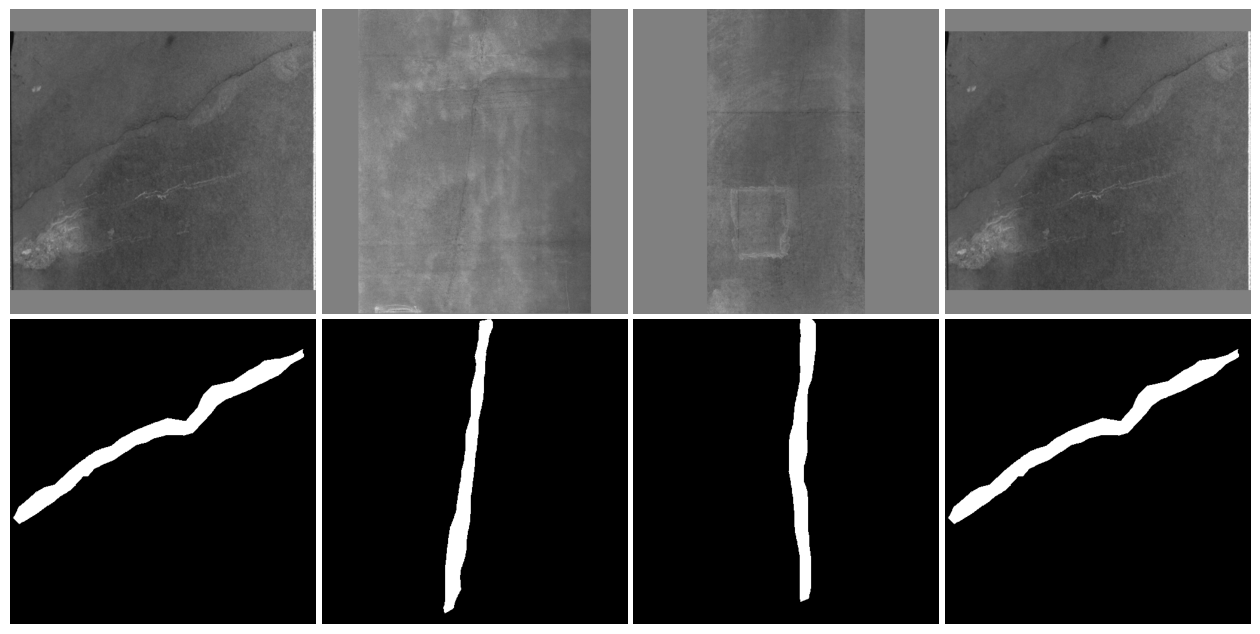

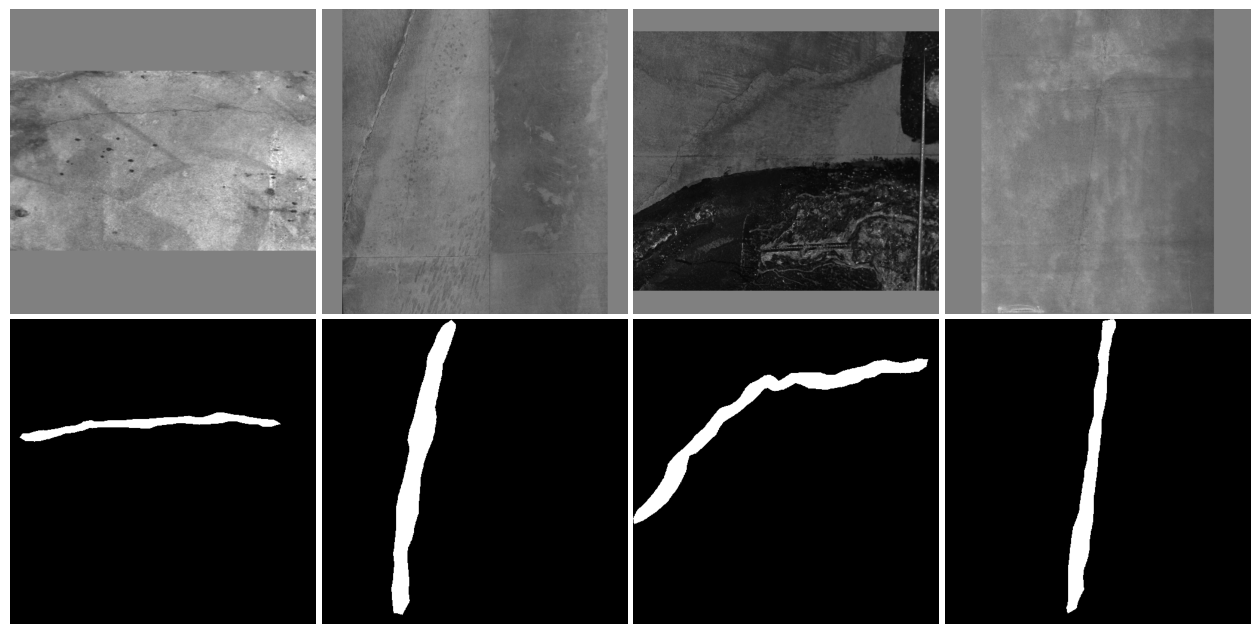

In [5]:
def plot_images_and_masks(start_idx, end_idx):
    # 设置子图布局，每组 2 行 4 列展示 4 张图片
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))  # 调整 figsize 来增大图像显示

    # 减少图像之间的间距
    plt.subplots_adjust(wspace=0.02, hspace=0.01)

    for i in range(start_idx, end_idx):
        show_data = next(train_dataset.create_dict_iterator())
        show_img = show_data["image"].asnumpy()
        show_mask = show_data["mask"].asnumpy()

        test_ent_mask = show_mask[i]
        mytest = show_mask[i].transpose(1, 2, 0)
        mytest = mytest.argmax(-1)

        # 计算列索引
        col_idx = i - start_idx

        # 显示原图
        axs[0, col_idx].imshow(show_img[i].transpose(1, 2, 0))
        axs[0, col_idx].axis('off')  # 不显示坐标轴

        # 显示 mask
        axs[1, col_idx].imshow(mytest * 255, cmap='gray')
        axs[1, col_idx].axis('off')  # 不显示坐标轴

    # 展示图像
    plt.show()

# 第一张图展示 1-4
plot_images_and_masks(0, 4)

# 第二张图展示 5-8
plot_images_and_masks(4, 8)


#### 3.2 运行训练流程


该部分定义了如何加载指定的模型，倒入预训练参数，然后利用自制数据集进行断点续训。

In [6]:
from nets.unet import Unet as unet
from mindspore import nn
from utils.train import train_epoch

def train_net(data_dir, epoch_size, weight_decay_param, lr_param, who_to_train="None"):
    """
    训练网络代码
    
    Args:
        data_dir (str): 数据集路径
        epoch_size (int): epoch大小
        weight_decay_param (float): 定义权重衰减值，以防止过拟合
        lr_param(float): 设定学习率，用于控制模型学习的速度
        who_to_train(str): 指明要训练的网络模型，可以选择 "VggUnet" 或 "ResUnet"
    """

    def modify_ckpt_param_names(ms_params, ckpt_path):
        """
        自定义了模型参数保存名称，在训练VggUnet的模型中，将Vgg部分的参数名称加上vgg.features.开头
    
        Args:
            ms_params : 模型参数
            ckpt_path (str): 存储路径
        """
        new_params_list = []
        # 遍历整个参数
        for ms_param in ms_params:
            value = ms_param.data
            name = ms_param.name
            # 找到vgg部分参数
            if not name.startswith('up') and not name.startswith('final'):
                new_name = "vgg.features." + name
                new_params_list.append({"name": new_name, "data": ms.Tensor(value)})
            else:
                new_params_list.append({"name": name, "data": ms.Tensor(value)})

        ms.save_checkpoint(new_params_list, ckpt_path)

    # 构建训练数据集
    train_dataset = create_multi_class_dataset(data_dir, [512, 512], 1, 4,
                                               num_classes=2, is_train=True,
                                               split=1,
                                               rank=0, group_size=1, shuffle=True)
    # 指定 ResUnet 进行训练，加载其预训练参数
    if "ResUnet" in who_to_train:
        Unet = unet(pretrained=False, num_classes=2, backbone='resnet50')
        ResUnet_ckpt_path = "pth/res_unet.ckpt"
        ms.load_checkpoint(ResUnet_ckpt_path, Unet)
    # 指定 VggUnet 进行训练，加载其预训练参数
    elif "VggUnet" in who_to_train:
        Unet = unet(pretrained=False, num_classes=2, backbone='vgg')
        VggUnet_ckpt_path = "pth/vgg_unet.ckpt"
        ms.load_checkpoint(VggUnet_ckpt_path, Unet)
    else:
        print("请输入正确的模型名称")

    # 定义优化器
    optimizer = nn.Adam(Unet.trainable_params(), lr_param, weight_decay=weight_decay_param)
    # 定义损失函数
    loss_fn = nn.SoftmaxCrossEntropyWithLogits(sparse=False, reduction='mean')
    # 进行训练
    for epoch in range(epoch_size):
        train_epoch(epoch, Unet, loss_fn, optimizer, train_dataset)

    print('Finished Training')
    
    # 模型保存部分
    if "VggUnet" in who_to_train:
        save_path = './VggUnet.ckpt'
        params = Unet.get_parameters()
        modify_ckpt_param_names(params, save_path)
    else:
        save_path = './ResUnet.ckpt'
        ms.save_checkpoint(Unet, save_path)



运行以下代码来进行模型的训练

模型训练完成后，将在当前文件夹下生成相应的模型文件，命名为 VggUnet.ckpt 或 ResUnet.ckpt。这些文件包含了训练好的模型权重，可用于后续的推理和评估。



In [7]:
# 该段代码仅演示了训练 VggUnet ，并且epoch数设为了10。 可以指定 who_to_train="ResUnet"来训练VggUnet
train_net(data_dir, epoch_size=10, weight_decay_param=0.0005, lr_param=0.0001, who_to_train="VggUnet")

[WARNING] ME(6645:139780193568576,MainProcess):2024-09-29-13:52:05.670.538 [mindspore/dataset/core/config.py:679] The shared memory is on, multiprocessing performance will be improved. Note: the required shared memory can't exceeds 80% of the available shared memory.


Train Epoch: 0 [0/3 (0%)]	Loss: 0.122080

Train Epoch: 1 [0/3 (0%)]	Loss: 0.059170

Train Epoch: 2 [0/3 (0%)]	Loss: 0.048486

Train Epoch: 3 [0/3 (0%)]	Loss: 0.044688

Train Epoch: 4 [0/3 (0%)]	Loss: 0.036073

Train Epoch: 5 [0/3 (0%)]	Loss: 0.030048

Train Epoch: 6 [0/3 (0%)]	Loss: 0.028006

Train Epoch: 7 [0/3 (0%)]	Loss: 0.026068

Train Epoch: 8 [0/3 (0%)]	Loss: 0.023666

Train Epoch: 9 [0/3 (0%)]	Loss: 0.021772

Finished Training


### Step 4. 模型加载

该部分用于加载预训练的UNet模型（ResNet-50和VGG-16为骨干网络），并加载相应的预训练模型参数以来进行推理。

In [8]:

def load_models(res_ckpt_path,vgg_ckpt_path):
    """
    从 .ckpt 文件中加载预训练的模型
    
    Args:
        res_ckpt_path (str): 包含 res-unet 网络参数的.ckpt 文件路径
        vgg_ckpt_path (str): 包含 vgg-unet 网络参数的.ckpt 文件路径
    
    Returns:
        ms.Model: 加载预训练参数的 res-unet 网络
        ms.Model: 加载预训练参数的 vgg-unet 网络
    """
    res_unet = unet(pretrained=False, num_classes=2, backbone='resnet50').set_train(False) # 构建res_unet网络
    vgg_unet = unet(pretrained=False, num_classes=2, backbone='vgg').set_train(False) # 构建 vgg——unet网络
    
    # 加载预训练参数到网络
    ms.load_checkpoint(res_ckpt_path, res_unet)
    ms.load_checkpoint(vgg_ckpt_path, vgg_unet)

    # 打印 ResNet50 UNet 模型的参数信息
    print("ResNet50 UNet 模型的参数信息:")
    for param in res_unet.get_parameters():
        print(f"参数名称: {param.name}, 参数维度: {param.shape}, 是否可训练: {param.requires_grad}")

# 打印 VGG UNet 模型的参数信息
    print("\nVGG UNet 模型的参数信息:")
    for param in vgg_unet.get_parameters():
        print(f"参数名称: {param.name}, 参数维度: {param.shape}, 是否可训练: {param.requires_grad}")

    
    return res_unet, vgg_unet


- 执行下面的代码块获得运行结果：

In [9]:
# 加载模型
ResUnet, VggUnet = load_models(res_ckpt_path="pth/res_unet.ckpt",vgg_ckpt_path="pth/vgg_unet.ckpt")

ResNet50 UNet 模型的参数信息:

参数名称: resnet.conv1.weight, 参数维度: (64, 3, 7, 7), 是否可训练: True

参数名称: resnet.bn1.moving_mean, 参数维度: (64,), 是否可训练: False

参数名称: resnet.bn1.moving_variance, 参数维度: (64,), 是否可训练: False

参数名称: resnet.bn1.gamma, 参数维度: (64,), 是否可训练: True

参数名称: resnet.bn1.beta, 参数维度: (64,), 是否可训练: True

参数名称: resnet.layer1.0.conv1.weight, 参数维度: (64, 64, 1, 1), 是否可训练: True

参数名称: resnet.layer1.0.bn1.moving_mean, 参数维度: (64,), 是否可训练: False

参数名称: resnet.layer1.0.bn1.moving_variance, 参数维度: (64,), 是否可训练: False

参数名称: resnet.layer1.0.bn1.gamma, 参数维度: (64,), 是否可训练: True

参数名称: resnet.layer1.0.bn1.beta, 参数维度: (64,), 是否可训练: True

参数名称: resnet.layer1.0.conv2.weight, 参数维度: (64, 64, 3, 3), 是否可训练: True

参数名称: resnet.layer1.0.bn2.moving_mean, 参数维度: (64,), 是否可训练: False

参数名称: resnet.layer1.0.bn2.moving_variance, 参数维度: (64,), 是否可训练: False

参数名称: resnet.layer1.0.bn2.gamma, 参数维度: (64,), 是否可训练: True

参数名称: resnet.layer1.0.bn2.beta, 参数维度: (64,), 是否可训练: True

参数名称: resnet.layer1.0.conv3.weight, 参数维度: (256, 64

### Step 5. 模型推理

该部分对输入图像进行了处理，并使用 ResUnet 和 VggUnet 进行推理。随后，我们将两个模型的推理结果进行集成，采用取均值的方式将二者的结果结合。最后，通过线性插值的方法，将集成后的推理结果扩展到原始图片的尺寸。


In [10]:
def infer_and_segment(image, resunet, vggunet, target_size=(512, 512)):
    """
    用 ResUnet 和 VggUnet 模型进行图像分割，对推理结果进行集成，并修改推理结果尺寸到原图大小
    
    Args:
        image (PIL.Image): 输入图像
        resunet (ms.Model): 加载预训练参数的 res-unet 网络
        vggunet (ms.Model): 加载预训练参数的 vgg-unet 网络
        target_size (tuple): 以（宽度，高度）形式给出图片要变换到的目标尺寸
    
    Returns:
        np.array: 均值过后的推理结果
    """
    colors = [
    (0, 0, 0),
    (255, 255, 255),
    ]

    # 进行推理前图片预处理
    original_width, original_height = image.size
    image_data, new_width, new_height = preprocess_input(image, target_size)
    
    # 将推理照片转化为[N,C,H,W]格式
    image_data = np.expand_dims(np.transpose(np.array(image_data, np.float32), (2, 0, 1)), 0)
    
    # 获得推理结果
    resunet_output = resunet(ms.Tensor(image_data))[0]
    vggunet_output = vggunet(ms.Tensor(image_data))[0]

    # 对推理结果进行softmax
    resunet_pred = ms.ops.softmax(resunet_output.permute(1, 2, 0), axis=-1).asnumpy()
    vggunet_pred = ms.ops.softmax(vggunet_output.permute(1, 2, 0), axis=-1).asnumpy()

    # 对推理结果进行均值集成
    final_prediction = (resunet_pred + vggunet_pred) / 2

    # 恢复推理结果mask到原始图像大小
    final_prediction = final_prediction[int((512 - new_height) // 2): int((512 - new_height) // 2 + new_height), 
                                        int((512 - new_width) // 2): int((512 - new_width) // 2 + new_width)]
    final_prediction = cv2.resize(final_prediction, (original_width, original_height), interpolation=cv2.INTER_LINEAR)
    # 对预测结果的两类进行argmax（获得每个像素点属于哪一类）
    final_prediction = final_prediction.argmax(axis=-1)
    segmented_img = np.reshape(np.array(colors, np.uint8)[np.reshape(final_prediction, [-1])],[original_height, original_width, -1],)

    plt.imshow(segmented_img, cmap="gray")
    plt.title("predicted segmentation mask")
    plt.show()
    
    return segmented_img

- 执行下面的代码块获得运行结果：

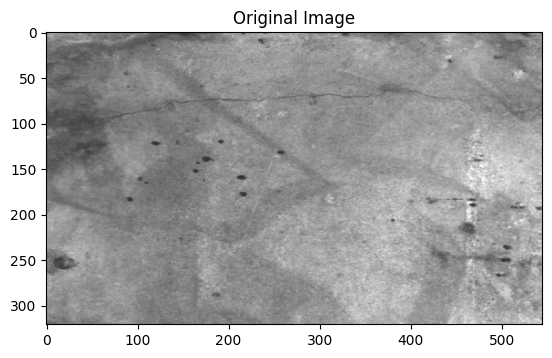

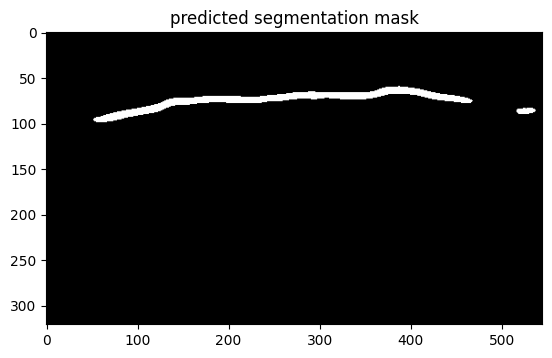

In [11]:
# 加载照片
image_path = "data/train/0001/image.png"
original_image = Image.open(image_path)

# 显示原始图片
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.show()


# 显示分割后的图片
Pr_Final = infer_and_segment(original_image, ResUnet, VggUnet)
segmentation_result = Pr_Final
segmentation_result = Image.fromarray(segmentation_result)
segmentation_result.save("pr_mask.png")

### Step 6. 进行裂缝区域精确识别
#### 该部分包括3个阶段
1. 图像后处理与边缘检测：对推理结果进行进一步处理，以增强图像的边缘特征。
2. 区域分析与噪声去除：对图像进行区域分析，识别出裂缝区域，并去除可能的噪声干扰。
3. 裂缝边缘信息叠加：将检测到的裂缝边缘信息叠加至原始图像中，以便更直观地展示裂缝的具体位置和形状。

#### 6.1 图像后处理&边缘检测
该部分先对图像进行了一定增强，再利用 XDoG (Extended Difference of Gaussians) 算法来对图像进行边缘检测，然后阈值进行二值化边缘，最后对原图取反色，方便后续的去除噪声操作。
XDoG (Extended Difference of Gaussians) 巧妙的引入参数来控制了截止频率较高的高斯滤波器的强度,对阈值函数的进一步修正（通过引入tanh函数）来实现了较好的边缘检测结果
参数解释：
 - epsilon   
 阈值函数的截止值
 - gamma    
 截止频率较高的高斯滤波器的强度
 - k       
 两个高斯算子尺度σ的差异
 - phi  
 控制着输出曲线的斜率，phi较小的时候，图像中的值对亮度变化很敏感，而phi越大，斜率则会变小，对原图中亮度的变化越不明显


In [12]:
def apply_xdog_filter(original_image_gray, epsilon=0.008, gamma=0.98, k=4, phi=1200):
    """
    使用 XDoG 算法对增强后的图片进行边缘检测
        
    Args:
        original_image_gray (np.array): 原始图像（灰度图版本）
        epsilon (float): XDoG epsilon 参数
        gamma (float): XDoG gamma 参数
        k (int): XDoG k 参数
        phi (int): XDoG phi 参数
    
    Returns:
        np.array: 边缘检测后图像结果
    """
    # 进行xdog算法获得边缘信息
    original_image_gray = cv2.convertScaleAbs(original_image_gray, alpha=0.4, beta=50)
    xdog_result = xdog(original_image_gray, epsilon=epsilon, gamma=gamma, k=k, phi=phi)
    
    # 对边缘信息进行二值化处理
    _, binary_edges = cv2.threshold(xdog_result, 180, 255, cv2.THRESH_BINARY)
    inv = cv2.bitwise_not(binary_edges) # 进行反色

    plt.imshow(inv, cmap="gray")
    plt.title("edge detection result (inverted)")
    plt.show()

    
    return inv

- 执行下面的代码块获得运行结果：

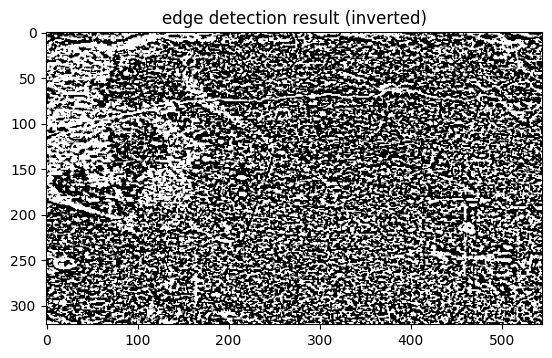

In [13]:
#  执行高斯差分算法来获得边缘信息
original_image_gray = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2GRAY)
xdog_edges = apply_xdog_filter(original_image_gray)

#### 6.2 区域分析&噪声去除
该部分使用regionprops来对图像进行分析，结合兴趣区域（上面的模型预测的mask部分），选取了一些特征来去除图像中非裂缝的噪声，同时使用形态学闭操作，来保证裂缝的连通性。

参数解释：
 - min_area    
 最小面积阈值，用途: 剔除面积过小的噪声区域，这通常代表着非裂缝的杂点
 - min_aspect_ratio     
 最小长宽比阈值，用途: 裂缝通常具有较高的长宽比（即长度远大于宽度），可以利用长宽比剔除那些接近于正方形的区域。
 - max_circularity         
 最大圆度阈值，用途: 裂缝通常是细长而不规则的，而不是接近圆形的。可以通过圆形度（周长平方与面积的比值）来剔除接近圆形的区域
 - min_eccentricity   
 最小离心率阈值，用途: 裂缝通常具有较高的延展性，接近1。可以剔除延展性较低的区域


In [14]:
def filter_regions(result_image, min_area=30, min_aspect_ratio=1.6, max_circularity=0.8, min_eccentricity=0.77):
    """
    利用几何特性，例如：大小，长宽比，圆度，离心率等来对原始图像区域内的噪声进行过滤
    
    Args:
        result_image (np.array): 边缘检测后图像结果
        min_area (int): 最小面积阈值
        min_aspect_ratio (float): 最小长宽比阈值
        max_circularity (float): 最大圆度阈值
        min_eccentricity (float): 最小离心率阈值
    
    Returns:
        np.array: 去除噪声过后的结果
    """
    label_image = measure.label(result_image)
    props = measure.regionprops(label_image)
    cleaned_image = np.zeros_like(result_image)

    plt.imshow(result_image, cmap="gray")
    plt.title("The edge detection result within the roi (without denoising)")
    plt.show()
    # 构建region props
    for prop in props:
        # 计算长宽比
        aspect_ratio = prop.major_axis_length / prop.minor_axis_length if prop.minor_axis_length > 0 else 0
        # 计算圆形度
        circularity = (4 * math.pi * prop.area) / (prop.perimeter ** 2) if prop.perimeter > 0 else 0
        eccentricity = prop.eccentricity

        if prop.area >= min_area and aspect_ratio >= min_aspect_ratio and circularity < max_circularity and eccentricity >= min_eccentricity:
            cleaned_image[label_image == prop.label] = 255

    plt.imshow(cleaned_image, cmap="gray")
    plt.title("The edge detection result within the roi (with denoising)")
    plt.show()

    # 进行形态学开操作
    kernel = np.ones((3,3), np.uint8)
    cleaned_image = cv2.morphologyEx(cleaned_image, cv2.MORPH_CLOSE, kernel)
    plt.imshow(cleaned_image, cmap="gray")
    plt.title("The edge detection result with closing operations")
    plt.show()

    return cleaned_image


- 执行下面的代码块获得运行结果：

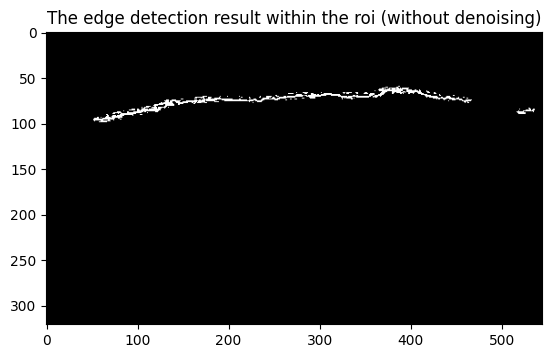

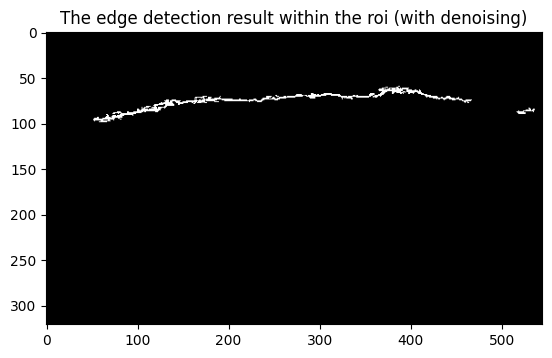

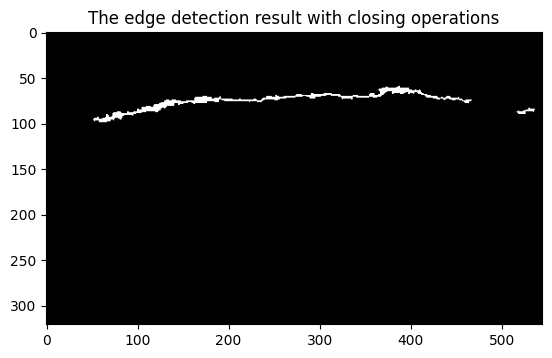

In [15]:
# 结合兴趣区域 & 去噪过程
result_image = cv2.bitwise_and(xdog_edges, cv2.cvtColor(np.array(segmentation_result), cv2.COLOR_RGB2GRAY))
cleaned_image = filter_regions(result_image)

#### 6.3 显示结果
该部分将检测到的裂缝叠加在原始图像上，显示最终的结果。

In [16]:
def overlay_crack_detection(cleaned_image, original_image):
    """
    叠加检测到的裂缝至原始图像上，并显示结果
    
    Args:
        cleaned_image (np.array): 去除噪声后的边缘图像
        original_image (np.array): 原始BGR图像
    
    Returns:
        np.array: 最终检测结果
    """
    opencv_image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)
    crack_image_rgb = cv2.cvtColor(cleaned_image, cv2.COLOR_GRAY2BGR)
    crack_image_rgb[:, :, :2] = 0  # 保留红色通道
    # 叠加裂缝信息和原始图像
    overlay_image = cv2.addWeighted(opencv_image, 0.8, crack_image_rgb, 0.5, 0)
    
    plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Crack Detection Result")
    plt.show()
    
    return overlay_image

- 执行下面的代码块获得运行结果：

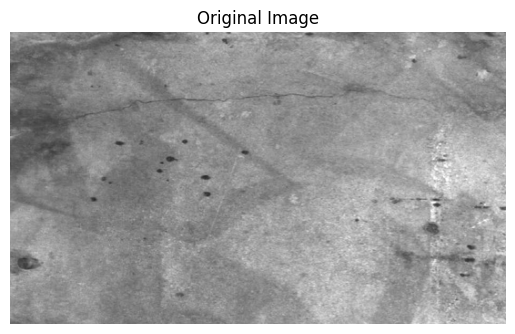

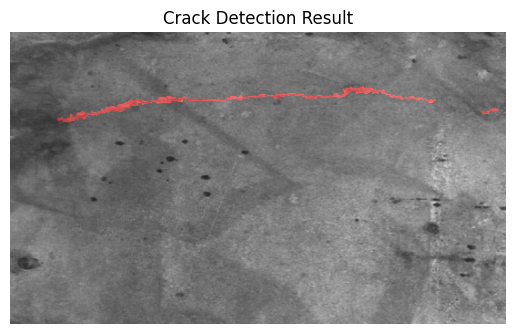

成功保存结果至result.png


In [17]:
# 显示原始图片
plt.imshow(original_image, cmap="gray")
plt.axis('off')
plt.title("Original Image")
plt.show()

# 显示裂缝检测后的结果
overlay_image = overlay_crack_detection(cleaned_image, original_image)
if(cv2.imwrite("result.png", overlay_image)):
    print("成功保存结果至result.png")